# Метод главных компонент


##Теория

Есть стандартное представление данных в виде таблицы - матрицы x. Строки - объекты (n), столбцы - признаки(m). Можем сказать, что признаки - оси, а объекты - точки в такой СК. Получается облако точек в m-мерном пространстве.\
Строки $x_{i,*}$, столбцы $x_{*,i}$.\
Выбрали в пространстве какой-то вектор v, на который проецируем все точки.\
Проекция i-го объекта $p_i = \frac{(x_{i,*}, v)}{|v|}$.
Вектор p из n проекций $p = \{x_{ij}\}\frac{v}{|v|} = \{p_i\}$.\
Хотим найти такой вектор v, чтобы дисперия $D[p_i]$ была максимальной.
(Дисперсия задает разброс величины, максимизирование дисперсии означает описание максимального количества данных).\
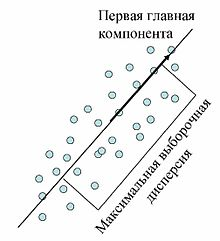

Считаем, что данные - случайные величины.\
Распишем дисперсию через мат ожидания и воспользуемся формулой для $p_i$: \
$D[p_i] = M[(p_i - M[p_i])^2] = \frac{1}{n} \sum_{i} (p_i - \frac{1}{n}\sum_{k}p_k)^2 = \frac{1}{n} \sum_{i} (\frac{(x_{i,*}, v)}{|v|} - \frac{1}{n}\sum_{k}\frac{(x_{k,*}, v)}{|v|})^2$\
Выносим знаменатель и расписываем скалярное произведение:\
$D[p_i] = \frac{1}{v^2}\frac{1}{n}\sum_{i}(\sum_{j}x_{ij}v_j - \frac{1}{n}\sum_{k}\sum_{j}x_{kj}v_{j})^2 = \frac{1}{v^2}\frac{1}{n}\sum_{i}(\sum_{j}x_{ij}v_j - \frac{1}{n}\sum_{j}\sum_{k}x_{kj}v_{j})^2 = \frac{1}{v^2}\frac{1}{n}\sum_{i}(\sum_{j}v_j(x_{ij} - \frac{1}{n}\sum_{k}x_{kj}))^2$
Вносим $\frac{1}{n}$ под знак суммы:\
$D[p_i] = \frac{1}{v^2}\sum_{i}(\sum_{j}v_j\frac{(x_{ij} - \frac{1}{n}\sum_{k}x_{kj})}{\sqrt n})^2$\
Обозначим дробь $X_{ij} = \frac{(x_{ij} - \frac{1}{n}\sum_{k}x_{kj})}{\sqrt n} = \frac{x_{ij} - M[x_{*,j}]}{\sqrt n}$\
Тогда формула дисперсии приобретает вид:\
$D[p_i] = \frac{1}{v^2}\sum_{i}(\sum_{j}v_jX_{ij})^2$\
v - столбец m x 1, X - матрица n x m, Xv - столбец n x 1\
$D[p_i] = \frac{1}{v^2} (Xv, Xv) = \frac{1}{v^2} (Xv)^T Xv = \frac{1}{v^2} v^T X^T Xv$\
Обозначим $C = X^TX$ размера m х m\
$D[p_i] = \frac{v^TCv}{v^Tv}$ -  такое взаимодействие между вектором v и матрицей C называется **отношением Реллея**.\
Проанализируем матрицу C:\
$C = \{C_{jq}\} = (X_{*,j}, X_{*,q}) = \frac{1}{n}\sum_{i}(x_{ij} - M[x_{*,j}])(x_{iq} - M[x_{*,q}]) = M[(x_{ij} - M[x_{*,j}])(x_{iq} - M[x_{*,q}])] = {cov(x_{*,j}, x_{*,q})}$\
(ковариация - мера зависимости двух случайных величин. cov > 0 - большие изменения одной величины приводят к сильным изменениям другой, cov < 0 - большие изменения одной величины приводят к несущественным изменениям другой)\

С - матрица ковариаций. Она симметрична ($C^T = C$). Воспользуемся **спектральным разложением матрицы** (разложение матрицы на основе собственных векторов) $C = ELE^{-1}$, где E - матрица собственных векторов С, L - диагональная матрица с соответсвующими собственными значениями.
Для симметричной матрицы собственные вектора можно выбрать ортонормированным, тогда E - ортогональная и $E^T = E^{-1}$, а значит $C = ELE^T$.\
$D[p_i] = \frac{v^TCv}{v^Tv} = \frac{v^TELE^Tv}{v^Tv} = \frac{(E^Tv)^TL(E^Tv)}{v^TEE^{-1}v} = \frac{(E^Tv)^TL(E^Tv)}{(E^Tv)^T (E^Tv)}$\
Таким образом перешли к пространству собственных векторов.\
$v = \sum_{j}v_je_j$\
$D[p_i]= \frac{(E^Tv)^TL(E^Tv)}{(E^Tv)^T (E^Tv)}$\
$E^Tv =  \sum_{k}e_kv = \sum_{k}e_k(\sum_{j}v_je_j)$\
Так как базиc ортонормированный, то $e_ke_j = 1, k = j$ и $e_ke_j = 0, k \neq j$. \
$D[p_i] = \frac{\sum_{j}v_j^2λ_j}{\sum_{j}v_j^2} = \sum_{j}\frac{v_j^2}{\sum_{q}v_q^2}\lambda_j = \sum_{j}(\frac{v_j}{\sqrt{\sum_{q}v_q^2}})^2\lambda_j$\
В знаменателе $\sqrt{\sum_{q}v_q^2}$ - длина вектора $v$. Выражение в скобках - нормированные компоненты вектора.
Если бы не было множителя $\lambda$, то дисперсия равнялась бы 1, а вектор $v$ пространстве собственных векторов (в осях $e_1, e_2, ...e_m$) лежал бы на поверхности единичной сферы. Множитель $λ$ деформирует сферу, и оси, вдоль которых она растягивается больше всего, определяют собственные векторы соответсвующие наибольшей дисперсии.
Вектор $v$, проецирование данных на который приводит к наибольшей дисперсии - собственный вектор, соответсвующей максимальному собственному значению $\lambda$.

Мы перешли к другой таблице данных. Изменились признаки - теперь они задаются в пространстве собственных векторов, которые выбраны ортонормированными. Таким образом, мы провели ортогонализацию и нормировку данных. Ортогонализация обеспечивает отсутствие корреляции между признаками, как следствие, уменьшается размерность пространства.
Признаки расположены по уменьшению дисперсии. Это позволяет выбрать главные (те, которые описывают бОльшее количество информации).

##Код

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [140]:
#загружаем датасет
data = pd.read_csv('https://drive.google.com/uc?id=1HEMMuPa-bAOvm21LY8H1Aoznao2b_e5X')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Предобрабатываем

In [141]:
data = data.drop_duplicates()

In [142]:
label_encoder = preprocessing.LabelEncoder()
data['type_of_meal_plan'] = label_encoder.fit_transform(data['type_of_meal_plan'])
data['room_type_reserved'] = label_encoder.fit_transform(data['room_type_reserved'])
data['market_segment_type'] = label_encoder.fit_transform(data['market_segment_type'])
data['booking_status'] = label_encoder.fit_transform(data['booking_status'])

data = data.drop('Booking_ID', axis=1)

In [143]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.515644,0.030986,0.708890,85.232557,2017.820427,7.423653,15.596995,3.552447,0.025637,0.023349,0.153411,103.423539,0.619655,0.672364
std,0.518715,0.402648,0.870644,1.410905,1.048131,0.173281,1.399851,85.930817,0.383836,3.069894,8.740447,0.681536,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,3.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,4.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,4.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


Функция отрисовки матрицы ковариаций

In [144]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Hotel Reservation data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9, rotation=45)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

<ipython-input-144-1f9715640e66>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
<ipython-input-144-1f9715640e66>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9, rotation=45)
<ipython-input-144-1f9715640e66>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


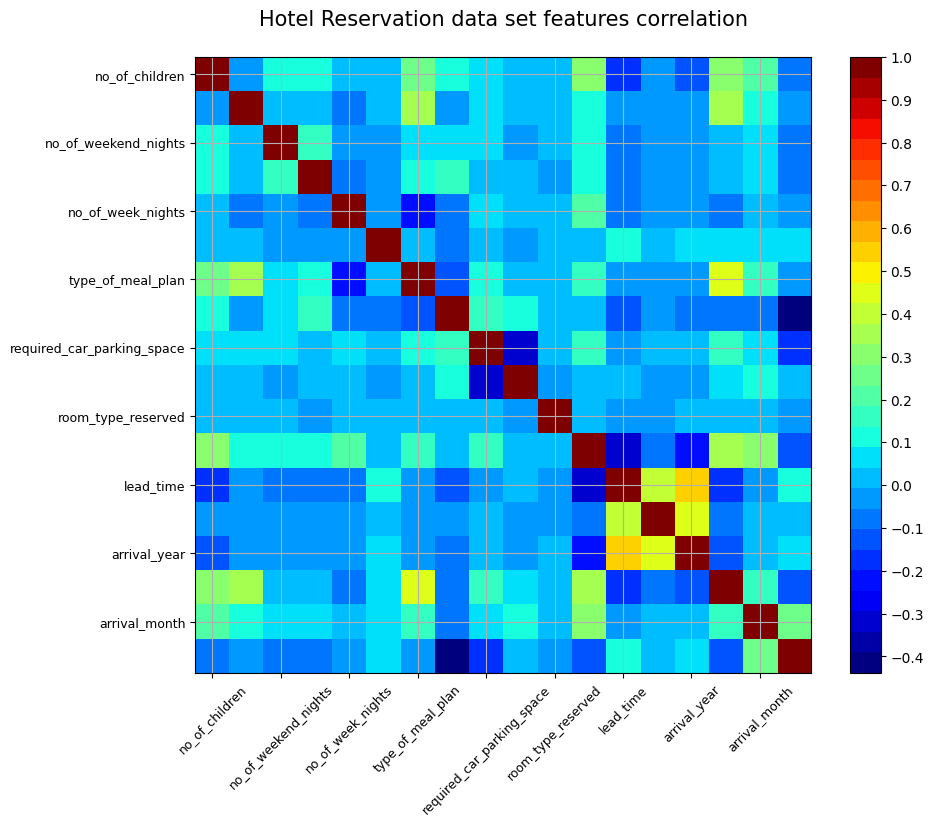

In [145]:
correlation_matrix(data)

In [146]:
X = data.drop('booking_status',axis=1)
y = data['booking_status']

Нормировка данных

In [147]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(36275, 17)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('MSE = ', mean_squared_error(y_test, pred))

MSE =  0.15251583271343375


Строим пространство из собственных векторов, которые описывают 95% данных

In [149]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(36275, 2)

Объясненная дисперсия

In [150]:
pca.explained_variance_ratio_

array([0.84828221, 0.14074477])

Количество компонент для описания 95% данных

In [151]:
pca.n_components_

2

In [152]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

LinearRegression()

In [153]:
pred_pca = lr_pca.predict(X_test_pca)

print('MSE = ', mean_squared_error(y_test, pred_pca))

MSE =  0.17371180560366223


Мы совсем немного потеряли в MSE, но сильно уменьшили размерность пространства (17 -> 2)

Визуализируем результат:

In [154]:
pca = PCA(n_components=None)
datax_pca = pca.fit(X)
datax_pca.explained_variance_ratio_

array([8.48282208e-01, 1.40744775e-01, 8.76830392e-03, 1.05843115e-03,
       3.54526655e-04, 2.41925725e-04, 1.75661331e-04, 1.17350207e-04,
       8.46987548e-05, 6.89242874e-05, 3.40187524e-05, 2.50898183e-05,
       1.42737139e-05, 1.27485199e-05, 1.19674849e-05, 3.40048200e-06,
       1.69667310e-06])

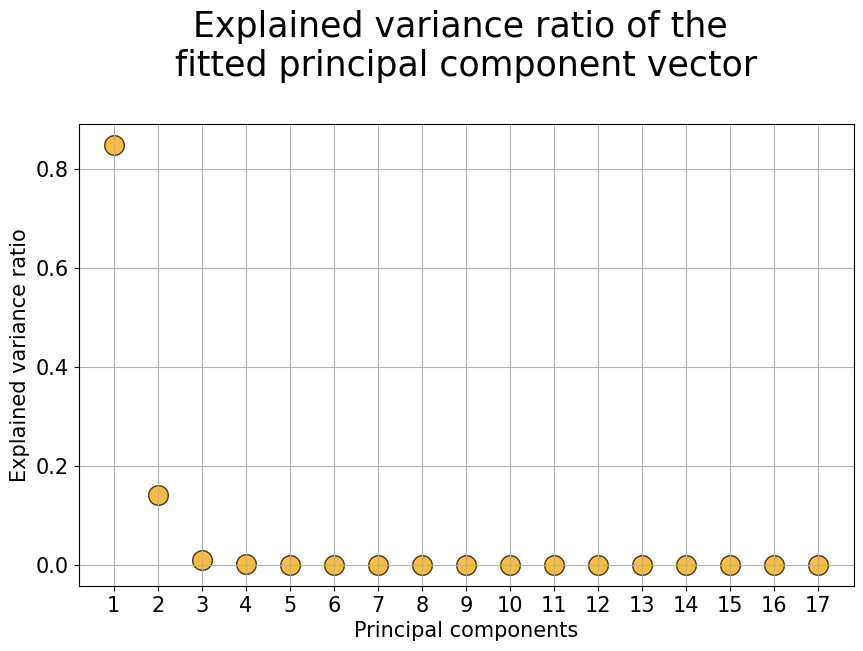

In [155]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(datax_pca.explained_variance_ratio_))],
            y=datax_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(datax_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()